In [176]:
import os

# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# # imblean provides tools for us to deal with imbalanced class sizes
# from imblearn.over_sampling import SMOTE 
# from imblearn.under_sampling import EditedNearestNeighbours
# from imblearn.combine import SMOTEENN


# # machine learning models
# from sklearn.pipeline import make_pipeline, Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier 
# from sklearn.svm import SVC  
# from sklearn.neighbors import KNeighborsClassifier
# import pickle # to save models and results

# # hyperopt - used for Bayesian hyperparameter tuning
# from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
# from hyperopt.pyll import scope

# # for evaluation of machine learning models
# from sklearn import linear_model, model_selection, metrics
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef,average_precision_score 
# from sklearn.metrics import matthews_corrcoef
# from sklearn.metrics import precision_recall_curve, average_precision_score
# from sklearn.metrics import auc

# for timing
from time import time
from tqdm import tqdm


In [215]:
df = pd.read_csv('../sample_ml_data.csv')
df.head()

,Unnamed: 0,date,open,high,low,close,volume,priceUsd,is_greater
0,0,2023-03-19 00:00:00+00:00,26969.503906,28440.560547,26907.716797,28038.675781,37769448859,27543.000446,1
1,1,2023-03-18 00:00:00+00:00,27448.117188,27725.953125,26636.261719,26965.878906,35723036817,27438.824800,1
2,2,2023-03-17 00:00:00+00:00,25055.123047,27787.812500,24955.169922,27423.929688,50730261335,26352.595051,1
3,3,2023-03-16 00:00:00+00:00,24373.457031,25190.326172,24225.111328,25052.789062,33866061747,24715.853005,1
4,4,2023-03-15 00:00:00+00:00,24770.925781,25240.615234,23964.910156,24375.960938,43655701450,24673.477986,0


In [216]:
# prep the data 
df["date"] = pd.to_datetime(df["date"])
#Covert others to float datatype
numeric_columns = ["open","high","low","close","volume","priceUsd"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, axis=1).astype(np.float32)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.dtypes

date          datetime64[ns, UTC]
open                      float32
high                      float32
low                       float32
close                     float32
volume                    float32
priceUsd                  float32
is_greater                  int64
dtype: object

In [217]:
dv = 'priceUsd'
cols = ['date', 'open', 'high', 'low', 'volume', 'priceUsd']
df = df[cols]
df.dtypes

date        datetime64[ns, UTC]
open                    float32
high                    float32
low                     float32
volume                  float32
priceUsd                float32
dtype: object

In [218]:
test = df[df['date'] >= '2022-08-01'] # need change to more dynamic 
train = df[df['date'] < '2022-07-01']
print(f'size of train dataset: {len(train)}')
print(f'size of test dataset: {len(test)}')

size of train dataset: 828
size of test dataset: 230


In [219]:
train.head()

,date,open,high,low,volume,priceUsd
260,2022-06-30 00:00:00+00:00,20108.312500,20141.160156,18729.656250,2.626724e+10,19349.007812
261,2022-06-29 00:00:00+00:00,20281.169922,20364.156250,19937.791016,2.355274e+10,20145.960938
262,2022-06-28 00:00:00+00:00,20731.544922,21164.423828,20228.812500,2.138154e+10,20708.248047
263,2022-06-27 00:00:00+00:00,21028.238281,21478.089844,20620.199219,2.096570e+10,21048.369141
264,2022-06-26 00:00:00+00:00,21496.494141,21783.724609,21016.269531,1.802717e+10,21355.992188


In [220]:
import mplfinance as mpf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [221]:
train

,date,open,high,low,volume,priceUsd
260,2022-06-30 00:00:00+00:00,20108.312500,20141.160156,18729.656250,2.626724e+10,19349.007812
261,2022-06-29 00:00:00+00:00,20281.169922,20364.156250,19937.791016,2.355274e+10,20145.960938
262,2022-06-28 00:00:00+00:00,20731.544922,21164.423828,20228.812500,2.138154e+10,20708.248047
263,2022-06-27 00:00:00+00:00,21028.238281,21478.089844,20620.199219,2.096570e+10,21048.369141
264,2022-06-26 00:00:00+00:00,21496.494141,21783.724609,21016.269531,1.802717e+10,21355.992188
...,...,...,...,...,...,...
1083,2020-03-29 00:00:00+00:00,6245.624512,6250.467285,5920.085938,2.837369e+10,6118.650391
1084,2020-03-28 00:00:00+00:00,6467.253906,6467.500977,6117.837891,3.488523e+10,6237.459473
1085,2020-03-27 00:00:00+00:00,6719.389160,6793.836426,6466.701660,3.458560e+10,6701.058105
1086,2020-03-26 00:00:00+00:00,6675.170898,6735.463867,6590.962891,3.531980e+10,6677.966309


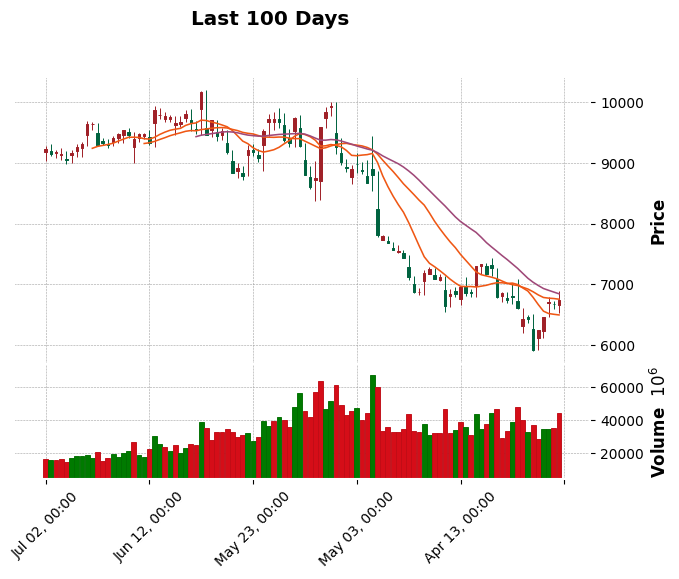

In [222]:
mpf.plot(train.rename(columns={'priceUsd':'close'}).set_index("date").tail(100),type="candle", style="charles", volume=True,title="Last 100 Days",
    mav=(10,20,30))

In [223]:
train = train.set_index("date") # Make the Close time the index
test = test.set_index("date") # Make the Close time the index
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train[dv].values.reshape(-1,1))
# scaled_test_data = scaler.transform(test['close'].values.reshape(-1,1))

In [224]:
total_dataset = pd.concat((train[dv], test[dv]), axis=0)

In [225]:
#Prediction Day
prediction_days = 7 # Number of days the neural network will predict

In [226]:

x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
 x_train.append(scaled_data[x-prediction_days:x, 0])
 y_train.append(scaled_data[x, 0])
 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [253]:
x_train.shape[1]

7

In [252]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2)) # To prevent overfitting
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2)) # To prevent overfitting
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

2023-03-25 21:39:23.289813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-25 21:39:23.292094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-25 21:39:23.293794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-03-25 21:39:23.794230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-25 21:39:23.795573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-25 21:39:23.797094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - 5s 12ms/step - loss: 0.1225
Epoch 2/50
13/13 [==============================] - 0s 16ms/step - loss: 0.0307
Epoch 3/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 5/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 6/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 7/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0056
Epoch 8/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 9/50
13/13 [==============================] - 0s 11ms/step - loss: 0.0051
Epoch 10/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 11/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 12/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 13/50
13/13 [==============================

In [190]:
model_inputs = total_dataset[len(total_dataset) - len(test) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


#Predict model based on test data
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

2023-03-25 21:00:36.335776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-25 21:00:36.338110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-25 21:00:36.339803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 3ms/step


In [191]:
predicted_df = pd.DataFrame(prediction_prices, columns=['predicted_price'])
test.reset_index(inplace=True)
res_df = pd.concat([test, predicted_df], axis = 1) 
test

,date,open,high,low,volume,priceUsd
0,2023-03-19 00:00:00+00:00,26969.503906,28440.560547,26907.716797,3.776945e+10,27543.000446
1,2023-03-18 00:00:00+00:00,27448.117188,27725.953125,26636.261719,3.572304e+10,27438.824800
2,2023-03-17 00:00:00+00:00,25055.123047,27787.812500,24955.169922,5.073026e+10,26352.595051
3,2023-03-16 00:00:00+00:00,24373.457031,25190.326172,24225.111328,3.386606e+10,24715.853005
4,2023-03-15 00:00:00+00:00,24770.925781,25240.615234,23964.910156,4.365570e+10,24673.477986
...,...,...,...,...,...,...
225,2022-08-05 00:00:00+00:00,22626.833984,23422.828125,22612.177734,2.888125e+10,23070.486694
226,2022-08-04 00:00:00+00:00,22848.214844,23198.009766,22485.701172,2.512023e+10,22858.411712
227,2022-08-03 00:00:00+00:00,22981.302734,23578.650391,22747.835938,2.628817e+10,23179.567210
228,2022-08-02 00:00:00+00:00,23308.433594,23415.041016,22710.083984,2.838925e+10,22982.856717


In [192]:
res_df.set_index('date', inplace=True)

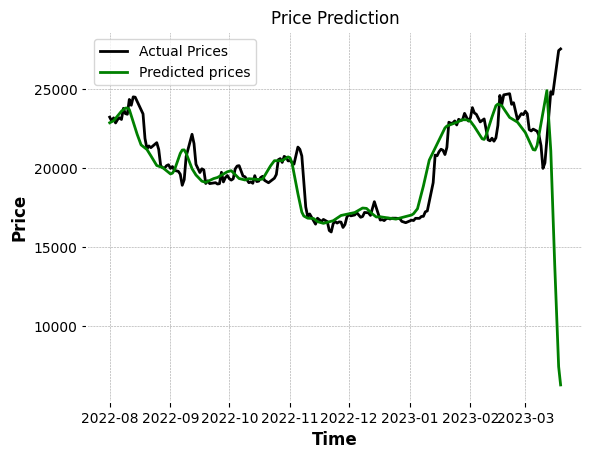

In [193]:
plt.plot(res_df[dv], color="black", label="Actual Prices")
plt.plot(res_df['predicted_price'], color="green", label="Predicted prices")
plt.title("Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()